In [264]:
import pandas as pd

In [24]:
client = MongoClient('mongodb://localhost:27017/')
db = client.food52_addenda

In [25]:
db.collection_names()

['new_data']

In [32]:
coll = db['new_data']
cursor = coll.find({})

In [33]:
f52 = [document for document in cursor]

In [35]:
len(f52)

9236

In [37]:
df2 = pd.DataFrame.from_records(f52)

In [139]:
df2 = pd.read_csv('data/food52_addenda_transformed.csv')

In [216]:
df2.head()

,Unnamed: 0,date_submitted,rating,servings,title,user_comments,number_comments,direct_time_format,days_since_submission,likes_over_time
0,0,"April 14, 2011",55,4.0,Beef Stroganoff with Mushrooms and Onions,"[""\n\nabout 3 years ago\nCampCook\n\nThere is ...",5,2011-04-14,2397,0.022945
1,1,"October 3, 2016",1,NaN,Asian Sliders with Gochujang Mayo,[],0,2016-10-03,398,0.002513
2,2,"August 13, 2014",3,NaN,Ground Turkey Stroganoff,['\n\n10 months ago\nHodie-Hi\n\nIngredients l...,2,2014-08-13,1180,0.002542
3,3,"October 4, 2017",64,68.0,Austin Diner-Style Queso,['\n\n23 days ago\nalex\n\nDo as the locals do...,8,2017-10-04,32,2.000000
4,4,"September 18, 2017",38,1.0,Mamba (Spicy Haitian Peanut Butter),"['\n\n26 days ago\nRegine\n\n“Cooking in HMB,”...",6,2017-09-18,48,0.791667


In [141]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9236 entries, 0 to 9235
Data columns (total 8 columns):
Unnamed: 0         9236 non-null int64
date_submitted     9236 non-null object
rating             9236 non-null int64
servings           7438 non-null float64
title              9236 non-null object
user_comments      9236 non-null object
number_comments    9236 non-null int64
date_formatted     9236 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 577.3+ KB


In [39]:
# df2['number_comments'] = df2['user_comments'].apply(lambda x: len(x))

In [48]:
# def to_num(col):
#     if col == '':
#         return None
#     if "," in col:
#         a = col.split(",")
#         return int("".join(a))
#     else:
#         return int(col)

In [43]:
# df2['rating'] = df2['rating'].apply(to_num)

In [49]:
# df2['servings'] = df2['servings'].apply(to_num)

In [52]:
# del df2['_id']

In [89]:
# df2.to_csv('data/food52_addenda_transformed.csv')

In [57]:
# test = "April 14, 2011"

In [79]:
# datedict = {
#          'January': '1','February': '2','March': '3', 'April': '4','May': '5', 'June': '6',
#          'July': '7', 'August': '8','September': '9', 'October': '10','November': '11','December': '12'
#         }

In [86]:
# def time_converter(col):  not necessary
#     out = []
#     for item in a:
#         if item in datedict:
#             out.append(datedict[item])
#         if item[-1] == ',':
#             out.append(item[:-1])
#         if item.isdigit():
#             out.append(item)
#     return "/".join(out)
        

In [142]:
del df2['date_formatted']

In [143]:
df2['direct_time_format'] = pd.to_datetime(df2['date_submitted'])

In [144]:
import numpy as np

In [145]:
df2['days_since_submission'] = (pd.to_datetime('November 5, 2017') - df2['direct_time_format']).dt.days

In [147]:
df2['likes_over_time'] = (df2['rating'] / df2['days_since_submission'])

In [269]:
import matplotlib.pyplot as plt
% matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122d86d30>]], dtype=object)

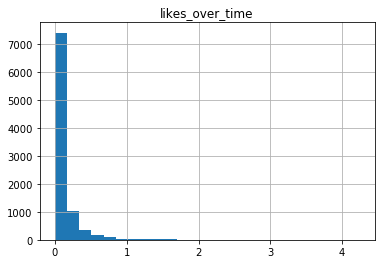

In [149]:
df2.hist('likes_over_time', bins=25)

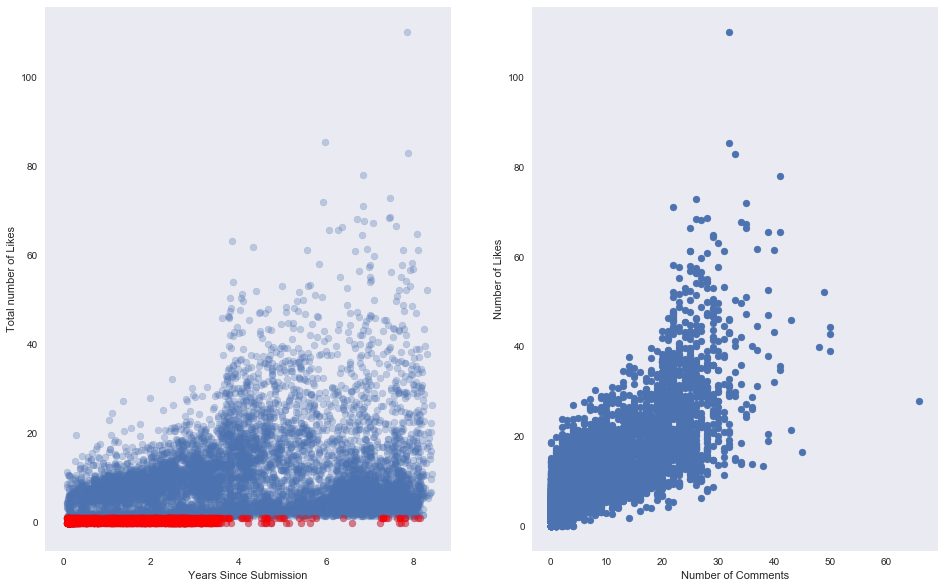

In [235]:
fig, ax = plt.subplots(1,2, figsize=(16, 10))
x = (df2['days_since_submission'].values)/365
y = np.sqrt(df2['rating'].values)
y_hat = np.log2((y+1))
y_hat2 = df2['number_comments'].values
x2 = x[np.where(y <= 1)]
y2 = y[np.where(y <= 1)]
ax[0].scatter(x, y, alpha=0.3)
ax[0].scatter(x2, y2, color='r', alpha=0.4)
ax[0].grid(False)
ax[1].scatter(y_hat2, y)
ax[1].grid(False)
# ax[1].scatter(x[np.where(y_hat<= 1)], y_hat[np.where(y_hat <= 1)], color='r', alpha=0.4)

ax[0].set_xlabel('Years Since Submission')
ax[0].set_ylabel('Total number of Likes')
ax[1].set_xlabel('Number of Comments')
ax[1].set_ylabel('Number of Likes')

In [221]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9236 entries, 0 to 9235
Data columns (total 10 columns):
Unnamed: 0               9236 non-null int64
date_submitted           9236 non-null object
rating                   9236 non-null int64
servings                 7438 non-null float64
title                    9236 non-null object
user_comments            9236 non-null object
number_comments          9236 non-null int64
direct_time_format       9236 non-null datetime64[ns]
days_since_submission    9236 non-null int64
likes_over_time          9236 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 721.6+ KB


In [222]:
df3 = df2[['rating', 'servings', 'number_comments', 'days_since_submission', 'likes_over_time']]

In [227]:
from pandas.plotting import scatter_matrix

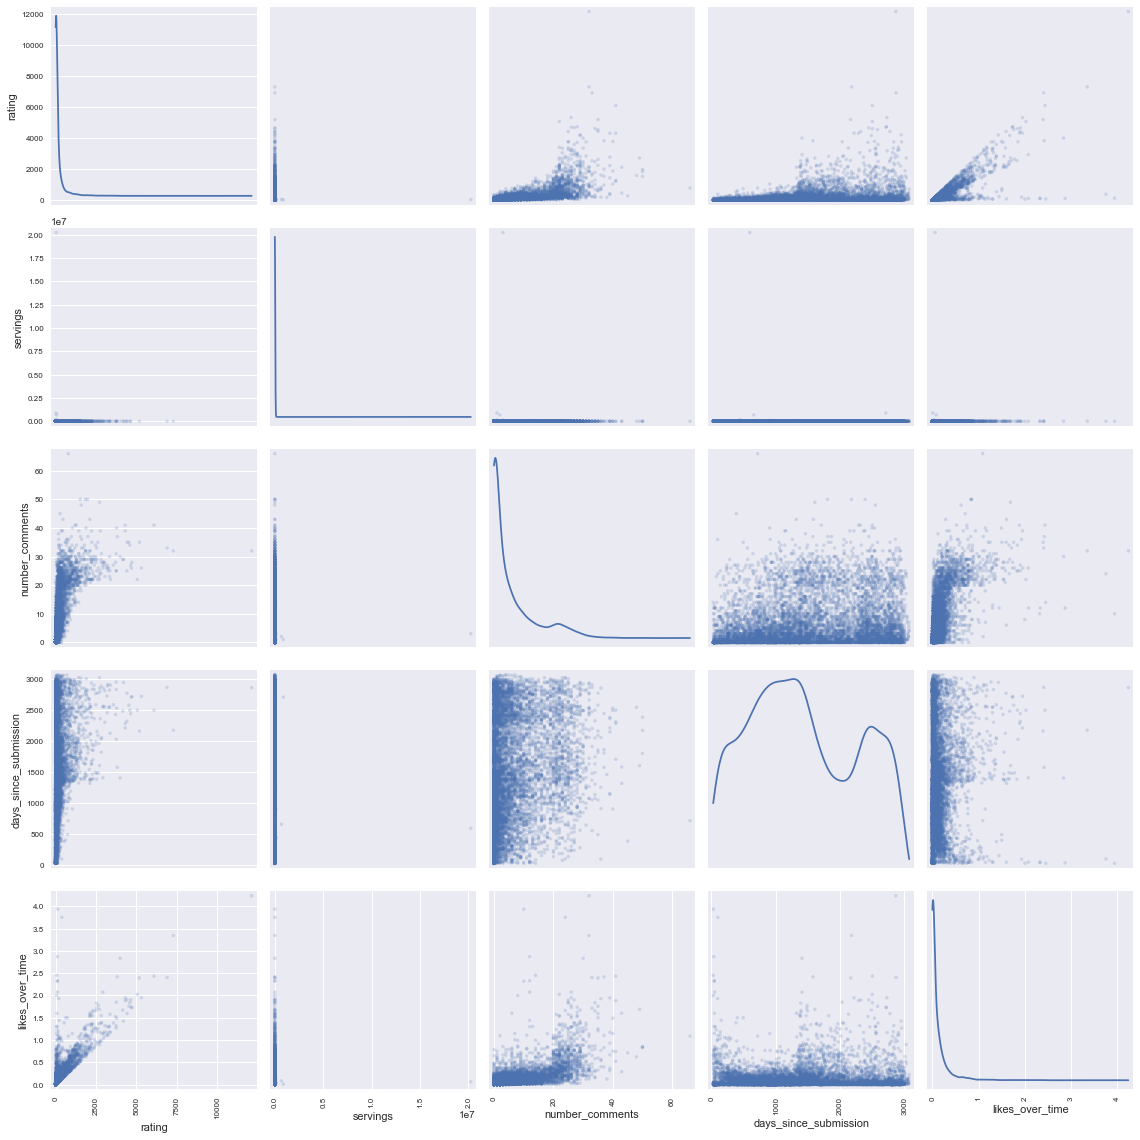

In [228]:
scatter_matrix(df3, alpha=0.2, figsize=(16, 16), diagonal='kde')
plt.tight_layout()

In [236]:
original = pd.read_csv('data/food52_scraped_data.csv')

In [245]:
original.head()

,october_rating,recipe,title,weblink
0,14,2 tablespoons unsalted butter\n1/4 cup diced y...,Austin Diner-Style Queso,https://food52.com/recipes/73529-austin-diner-...
1,29,1 pound shelled raw peanuts\n1 tablespoon plus...,Mamba (Spicy Haitian Peanut Butter),https://food52.com/recipes/73211-mamba-spicy-h...
2,2,2 cups (8 1/2 ounces) all-purpose flour\n1/2 c...,Sheet Pan Muffins,https://food52.com/recipes/73548-sheet-pan-muf...
3,92,"1 1/2 cups (300g) Puy lentils, washed\n4 clove...",Anna Jones' Favorite Lentils with Roasted Toma...,https://food52.com/recipes/73511-anna-jones-fa...
4,3,2 ounces Seedlip Garden 108\n0.75 ounces Lemon...,Seedlip's A Good Dill,https://food52.com/recipes/73252-seedlip-s-a-g...


In [248]:
df2.head()

,Unnamed: 0,date_submitted,november_rating,servings,title,user_comments,number_comments,direct_time_format,days_since_submission,likes_over_time
0,0,"April 14, 2011",55,4.0,Beef Stroganoff with Mushrooms and Onions,"[""\n\nabout 3 years ago\nCampCook\n\nThere is ...",5,2011-04-14,2397,0.022945
1,1,"October 3, 2016",1,NaN,Asian Sliders with Gochujang Mayo,[],0,2016-10-03,398,0.002513
2,2,"August 13, 2014",3,NaN,Ground Turkey Stroganoff,['\n\n10 months ago\nHodie-Hi\n\nIngredients l...,2,2014-08-13,1180,0.002542
3,3,"October 4, 2017",64,68.0,Austin Diner-Style Queso,['\n\n23 days ago\nalex\n\nDo as the locals do...,8,2017-10-04,32,2.000000
4,4,"September 18, 2017",38,1.0,Mamba (Spicy Haitian Peanut Butter),"['\n\n26 days ago\nRegine\n\n“Cooking in HMB,”...",6,2017-09-18,48,0.791667


In [239]:
del original['_id']

In [244]:
original.rename(columns={'rating':'october_rating'}, inplace=True)

In [247]:
df2.rename(columns={'rating':'november_rating'}, inplace=True)

In [249]:
merged_df = original.merge(df2, how='left', on='title')

In [262]:
merged_df.head()

,october_rating,recipe,title,weblink,date_submitted,november_rating,servings,user_comments,number_comments,direct_time_format,age_in_november,likes_over_time,age_in_october
0,14,2 tablespoons unsalted butter\n1/4 cup diced y...,Austin Diner-Style Queso,https://food52.com/recipes/73529-austin-diner-...,"October 4, 2017",64.0,68.0,['\n\n23 days ago\nalex\n\nDo as the locals do...,8.0,2017-10-04,32.0,2.000000,3.0
1,29,1 pound shelled raw peanuts\n1 tablespoon plus...,Mamba (Spicy Haitian Peanut Butter),https://food52.com/recipes/73211-mamba-spicy-h...,"September 18, 2017",38.0,1.0,"['\n\n26 days ago\nRegine\n\n“Cooking in HMB,”...",6.0,2017-09-18,48.0,0.791667,19.0
2,2,2 cups (8 1/2 ounces) all-purpose flour\n1/2 c...,Sheet Pan Muffins,https://food52.com/recipes/73548-sheet-pan-muf...,"October 5, 2017",76.0,NaN,"[""\n\n11 days ago\nGumba\n\nReminds me of HoJo...",14.0,2017-10-05,31.0,2.451613,2.0
3,92,"1 1/2 cups (300g) Puy lentils, washed\n4 clove...",Anna Jones' Favorite Lentils with Roasted Toma...,https://food52.com/recipes/73511-anna-jones-fa...,"October 3, 2017",130.0,4.0,['\n\n18 days ago\nJenn Travis\n\nThese are so...,10.0,2017-10-03,33.0,3.939394,4.0
4,3,2 ounces Seedlip Garden 108\n0.75 ounces Lemon...,Seedlip's A Good Dill,https://food52.com/recipes/73252-seedlip-s-a-g...,"September 21, 2017",5.0,1.0,[],0.0,2017-09-21,45.0,0.111111,16.0


In [251]:
del merged_df['Unnamed: 0']

In [254]:
merged_df.rename(columns={'days_since_submission': 'age_in_november'}, inplace=True)

In [318]:
merged_df['age_in_october'] = (pd.to_datetime('October 10, 2017') - pd.to_datetime(merged_df['date_submitted'])).dt.days

In [263]:
merged_df.to_csv('data/food52_merged.csv')

In [266]:
merged_df = pd.read_csv("data/food52_merged.csv")

In [286]:
merged_df.head()

,october_rating,recipe,title,weblink,date_submitted,november_rating,servings,user_comments,number_comments,direct_time_format,age_in_november,likes_over_time,age_in_october
0,14,2 tablespoons unsalted butter\n1/4 cup diced y...,Austin Diner-Style Queso,https://food52.com/recipes/73529-austin-diner-...,"October 4, 2017",64.0,68.0,['\n\n23 days ago\nalex\n\nDo as the locals do...,8.0,2017-10-04,32.0,2.000000,3.0
1,29,1 pound shelled raw peanuts\n1 tablespoon plus...,Mamba (Spicy Haitian Peanut Butter),https://food52.com/recipes/73211-mamba-spicy-h...,"September 18, 2017",38.0,1.0,"['\n\n26 days ago\nRegine\n\n“Cooking in HMB,”...",6.0,2017-09-18,48.0,0.791667,19.0
3,92,"1 1/2 cups (300g) Puy lentils, washed\n4 clove...",Anna Jones' Favorite Lentils with Roasted Toma...,https://food52.com/recipes/73511-anna-jones-fa...,"October 3, 2017",130.0,4.0,['\n\n18 days ago\nJenn Travis\n\nThese are so...,10.0,2017-10-03,33.0,3.939394,4.0
4,3,2 ounces Seedlip Garden 108\n0.75 ounces Lemon...,Seedlip's A Good Dill,https://food52.com/recipes/73252-seedlip-s-a-g...,"September 21, 2017",5.0,1.0,[],0.0,2017-09-21,45.0,0.111111,16.0
6,4,1 fresh habanero pepper\n10 ounces fresh or fr...,Raspberry Habanero Relish,https://food52.com/recipes/73492-raspberry-hab...,"October 2, 2017",16.0,2.0,[],0.0,2017-10-02,34.0,0.470588,5.0


In [268]:
del merged_df['Unnamed: 0']

In [284]:
merged_df.dropna(axis=0, inplace=True)

In [319]:
merged_df['delta_likes'] = merged_df['november_rating'] - merged_df['october_rating']

In [273]:
import numpy as np

9236 7437


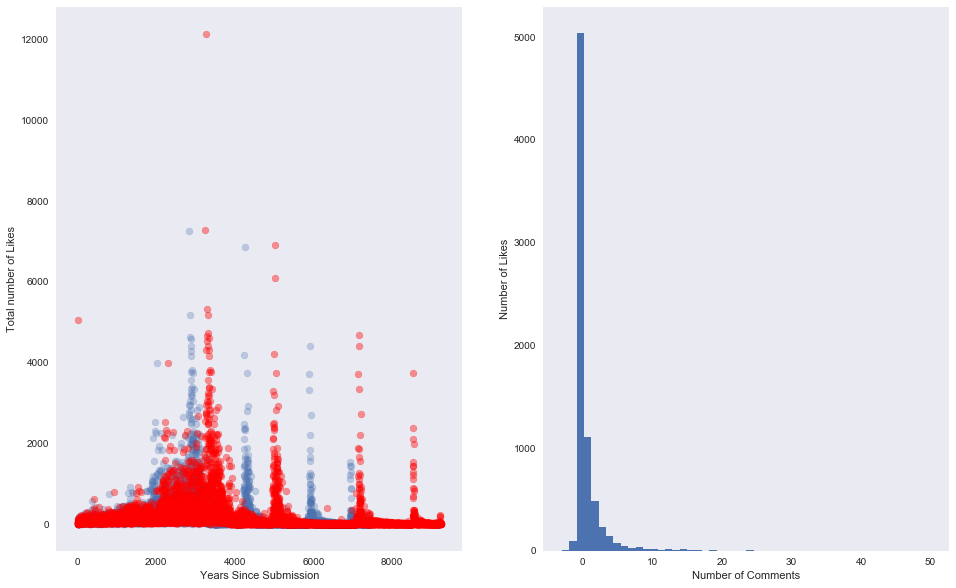

In [320]:
fig, ax = plt.subplots(1,2, figsize=(16, 10))

y = merged_df['october_rating'].values
x = np.arange(len(y))
y_hat = merged_df['delta_likes'].values
# y_hat = np.log2((y+1))
y_hat2 = df2['november_rating'].values
x2 = np.arange(len(y_hat2))
# y2 = y[np.where(y <= 1)]
ax[0].scatter(x, y, alpha=0.3)
ax[0].scatter(x2, y_hat2, color='r', alpha=0.4)
ax[0].grid(False)
ax[1].hist(y_hat, bins=50)
ax[1].grid(False)
# ax[1].scatter(x[np.where(y_hat<= 1)], y_hat[np.where(y_hat <= 1)], color='r', alpha=0.4)

ax[0].set_xlabel('Years Since Submission')
ax[0].set_ylabel('Total number of Likes')
ax[1].set_xlabel('Number of Comments')
ax[1].set_ylabel('Number of Likes')
print(len(y_hat2), len(y))

In [301]:
test = merged_df['november_rating'].values.flatten()

In [316]:
import random
subsample = []
for n in range(2500):
    idx = random.randint(1, 7437)
    subsample.append(test[idx])

In [305]:
np.array(subsample).shape

(2500,)

(array([  1.81800000e+03,   3.11000000e+02,   1.30000000e+02,
          5.90000000e+01,   3.60000000e+01,   2.60000000e+01,
          2.60000000e+01,   1.50000000e+01,   1.40000000e+01,
          1.10000000e+01,   6.00000000e+00,   8.00000000e+00,
          6.00000000e+00,   1.00000000e+01,   5.00000000e+00,
          4.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

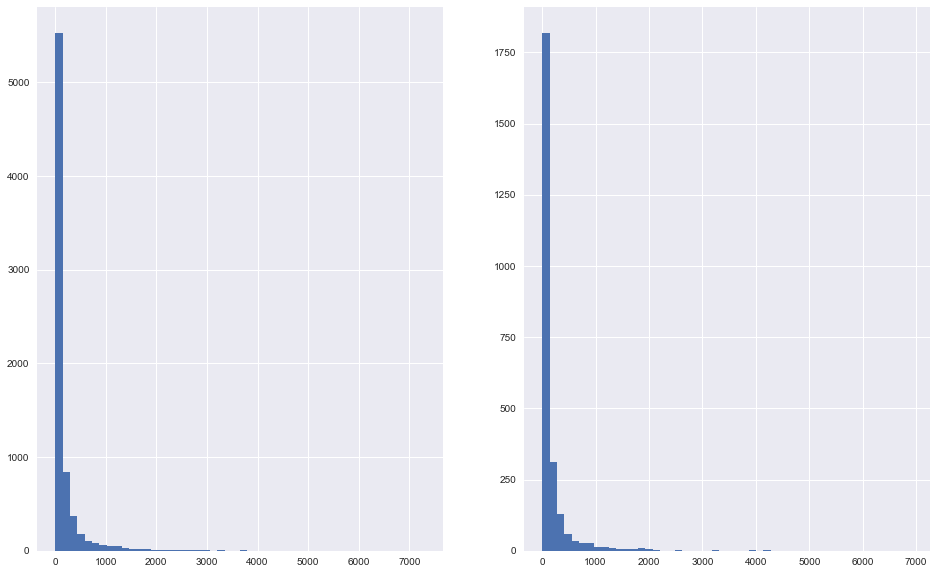

In [317]:
fig, ax = plt.subplots(1,2, figsize=(16, 10))
ax[0].hist(test, bins=50)
ax[1].hist(np.array(subsample), bins=50)